In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("kyphosis.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [4]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
df.corr()

,Age,Number,Start
Age,1.000000,-0.016687,0.057828
Number,-0.016687,1.000000,-0.425099
Start,0.057828,-0.425099,1.000000


<AxesSubplot:>

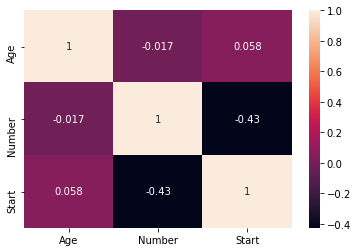

In [8]:
sns.heatmap(df.corr(), annot = True)

In [12]:
df["Kyphosis"] = pd.get_dummies(df["Kyphosis"], drop_first=True)

<AxesSubplot:xlabel='Number', ylabel='Age'>

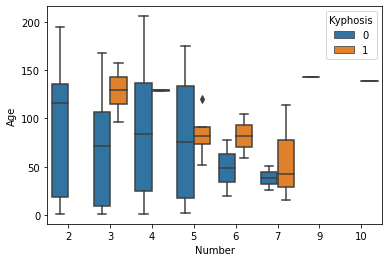

In [21]:
sns.boxplot(x = "Number", y = "Age", data = df, hue= "Kyphosis")

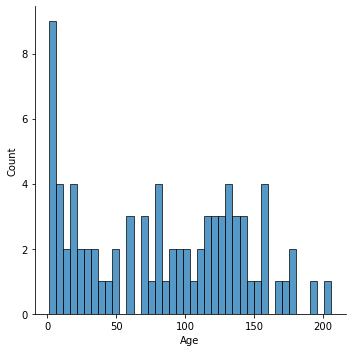

In [19]:
sns.displot(x = df["Age"], bins = 40)

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [22]:
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [23]:
X = df.drop("Kyphosis", axis=1)
y = df["Kyphosis"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [26]:
model = RandomForestClassifier(n_estimators=200)

In [27]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [28]:
predictions = model.predict(X_test)

In [29]:
print(confusion_matrix(predictions, y_test))

[[19  5]
 [ 0  1]]


In [30]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        24
           1       0.17      1.00      0.29         1

    accuracy                           0.80        25
   macro avg       0.58      0.90      0.58        25
weighted avg       0.97      0.80      0.86        25

